# Support Vector Machines
## Manual implementation

In [42]:
%matplotlib inline
import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


def plot(predictor, X, y, grid_size):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        indexing='ij'
    )
    
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)
    
    plt.contourf(
        xx, yy, Z,
        cmap=cm.Paired,
        levels=[-0.01, 0.01],
        extend='both',
        alpha=0.8
    )
    
    
    plt.scatter(
        flatten(X[:, 0]),
        flatten(X[:, 1]),
        c=flatten(y),
        cmap=cm.Paired
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

C:\Users\egorc\AppData\Local\conda\conda\envs\py34\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Users\egorc\AppData\Local\conda\conda\envs\py34\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\egorc\AppData\Local\conda\conda\envs\py34\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPR

     pcost       dcost       gap    pres   dres
 0: -1.3668e+01 -2.9389e+01  3e+02  2e+01  2e+00
 1: -2.5789e+01 -2.2872e+01  9e+01  5e+00  7e-01
 2: -3.2189e+01 -2.0837e+01  6e+01  3e+00  4e-01
 3: -1.5238e+01 -1.2451e+01  1e+01  5e-01  7e-02
 4: -1.1499e+01 -1.1084e+01  2e+00  9e-02  1e-02
 5: -1.0929e+01 -1.1049e+01  3e-01  6e-03  9e-04
 6: -1.1019e+01 -1.1021e+01  4e-03  7e-05  1e-05
 7: -1.1020e+01 -1.1020e+01  4e-05  7e-07  1e-07
 8: -1.1020e+01 -1.1020e+01  4e-07  7e-09  1e-09
Optimal solution found.


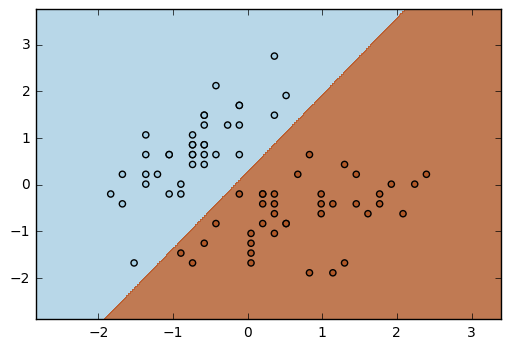

In [45]:
trainer = svm.SVMTrainer(svm.Kernel.linear())

X, y = load_iris(return_X_y=True)
X = X[y != 2]
y = y[y != 2]
x_sc = StandardScaler()
y_sc = StandardScaler()
X_std = x_sc.fit_transform(X)
y_std = y_sc.fit_transform(y)
X_std = X_std[:,:2]
grid_size = 500

X_train, X_test, y_train, y_test = train_test_split(X_std, y_std)

predictor = trainer.train(X_train, y_train)

plot(predictor, X_train, y_train, grid_size)
y_pred = np.apply_along_axis(predictor.predict, 1, X_test)

## Sklearn implementation

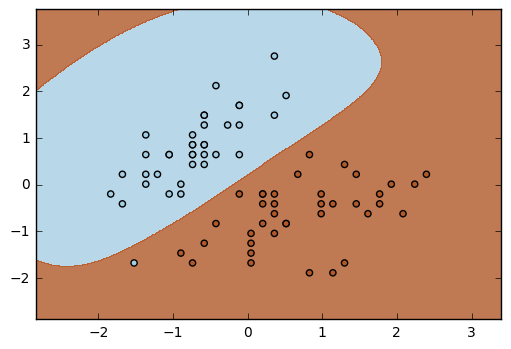

In [49]:
from sklearn.svm import SVC


svm_sk = SVC(C=0.1, kernel='rbf')
svm_sk = svm_sk.fit(X_train, y_train)
plot(svm_sk, X_train, y_train, grid_size)
y_pred_sk = svm_sk.predict(X_test)

## Comparing accuracy

In [53]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
acc_sk = accuracy_score(y_test, y_pred_sk)
print('Manual implementation accuracy: {}%\n'.format(acc*100) ,
     'Sklearn implementation accuracy: {}%'.format(acc_sk*100))

Manual implementation accuracy: 100.0%
 Sklearn implementation accuracy: 100.0%
